In [1]:
import csv#数据预处理版本
 
#read file, for example
file_path = 'C:/Users/chenxihui/Desktop/code/project/2010.csv'
file = open(file_path)
data = []
for i in file.readlines():
    data.append(i)
file.close()

In [2]:
new_data = []
for row in data:
    tmp = row.strip('\n')  #去掉每行最后的回车符
    tmp = tmp.split(',')   #根据','来分割字符串，使之成为含有一个个数据的列表
    new_data.append(tmp)   #new_data的每一行数据就是一个列表

In [3]:
select_data = []
length=len(new_data)
for i in range(length):
    if(new_data[i][0]=='2' or new_data[i][0]=='13' or new_data[i][0]=='14' or new_data[i][0]=='20' or new_data[i][0]=='33' or new_data[i][0]=='35' or new_data[i][0]=='38' or new_data[i][0]=='39' or new_data[i][0]=='56' or new_data[i][0]=='69' or new_data[i][0]=='73' or new_data[i][0]=='74' or new_data[i][0]=='75' or new_data[i][0]=='82' or new_data[i][0]=='87' or new_data[i][0]=='88' or new_data[i][0]=='101' or new_data[i][0]=='104' or new_data[i][0]=='106' or new_data[i][0]=='109' or new_data[i][0]=='110' or new_data[i][0]=='119' or new_data[i][0]=='124' or new_data[i][0]=='130' or new_data[i][0]=='137' or new_data[i][0]=='141' or new_data[i][0]=='144' or new_data[i][0]=='152' or new_data[i][0]=='153' or new_data[i][0]=='157' or new_data[i][0]=='161' or new_data[i][0]=='169' or new_data[i][0]=='176' or new_data[i][0]=='184' or new_data[i][0]=='188' or new_data[i][0]=='189' or new_data[i][0]=='193' or new_data[i][0]=='201' or new_data[i][0]=='202' or new_data[i][0]=='204' or new_data[i][0]=='206' or new_data[i][0]=='207' or new_data[i][0]=='210' or new_data[i][0]=='211' or new_data[i][0]=='212' or new_data[i][0]=='214' or new_data[i][0]=='218' or new_data[i][0]=='244' or new_data[i][0]=='246' or new_data[i][0]=='253' or new_data[i][0]=='256' or new_data[i][0]=='273' or new_data[i][0]=='276' or new_data[i][0]=='297'):
        select_data.append(new_data[i][3:])#[5:]

In [4]:
GC=[]
CL=[]
GG=[]
Length_select_data = len(select_data)
for i in range(Length_select_data):
    if(select_data[i][0]=='GC'):
        GC.append(select_data[i][2:])
    elif(select_data[i][0]=='CL'):
        CL.append(select_data[i][2:])
    else:
        GG.append(select_data[i][2:])

In [5]:
import numpy as np

GC_temp=np.array(GC)
GC_array=[]
GC_array = GC_temp.astype(np.float)#春季有90天，夏季有91天，秋有92天，冬有92天

CL_temp=np.array(CL)
CL_array=[]
CL_array = CL_temp.astype(np.float)

GG_temp=np.array(GG)
GG_array=[]
GG_array = GG_temp.astype(np.float)
GG_array[1]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.031, 0.063, 0.069,
       0.069, 0.15 , 0.125, 0.125, 0.119, 0.125, 0.088, 0.069, 0.075,
       0.063, 0.038, 0.05 , 0.044, 0.031, 0.006, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   ])

In [27]:
a=np.array([[1,3,5],[2,4,6]])
print(np.max(a[0]))
print(a)

5
[[1 3 5]
 [2 4 6]]


In [6]:
sums = 0
average=0
ave = []
temp = []
GC_array2=GC_array.T
for i in range(48):   
    for j in range(len(GC_array)):     
        if((j+1)%365==0):
            temp.append(np.mean(GC_array2[i][j-364:j+1]))
    ave.append(temp)
    temp=[]
GC_array_ave=np.array(ave).T

In [7]:
GC_array_st=[]#标准化
for i in range(54):
    for j in range(48):
        GC_array_ave[i][j]=GC_array_ave[i][j]/np.sum(GC_array_ave[i])
np.max(GC_array_ave)

0.37280115270426845

In [7]:
GC_array2=GC_array.T
len_GC_array=len(GC_array)
for i in range(48):
    for j in range(len_GC_array):
        GC_array2[i][j]=(GC_array2[i][j]-np.min(GC_array2[i]))/(np.max(GC_array2[i])-np.min(GC_array2[i]))
GC_array_stand=GC_array2.T#标准化处理完之后的
print(np.max(GC_array_stand))

1.0


In [55]:
len(GC_array)

19710

In [51]:
GC_array2[47]

array([0.00983123, 0.08573489, 0.05684537, ..., 0.298     , 0.28      ,
       0.317     ])

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
from collections import defaultdict
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt


def generate_list():
    list = []
    return list

def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2
    
    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes 
    of both lists correspond to each other.
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(generate_list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
    """
    Given a data set and a list of points betweeen other points,
    assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point. 
    Return a an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements. Also
    If there are Y points in `centers` there will be Y unique
    possible values within the returned list.
    """
    assignments = []
    for point in data_points:
        shortest = (1000)  # positive infinity
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if(val < shortest):
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


def distance(a, b):
    """
    """
    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            
            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers


def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    centers_history = []
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        centers_history.append(new_centers)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)#centers_history[-1]

    return zip(assignments, dataset),centers_history

In [10]:
out,final_center = k_means(GC_array_ave, 5)
list = []   # so, we need to show it in list
for i in out:
    list.append(i)
print(list[0])

(0, array([0.0124717 , 0.01093044, 0.01045198, 0.01029299, 0.01018972,
       0.01015172, 0.00990537, 0.0099254 , 0.01007728, 0.0106437 ,
       0.01236447, 0.02040397, 0.01253017, 0.01264477, 0.01685242,
       0.01853675, 0.02126242, 0.02417733, 0.02651674, 0.02621582,
       0.02628049, 0.02520531, 0.02492388, 0.02589522, 0.02765806,
       0.0283737 , 0.02712595, 0.02912598, 0.02972267, 0.03316926,
       0.03751531, 0.0412678 , 0.04579259, 0.05216926, 0.06483859,
       0.08179947, 0.09431481, 0.10519325, 0.11600041, 0.12282841,
       0.1315989 , 0.14043655, 0.1422666 , 0.13657128, 0.13168893,
       0.12506201, 0.1123538 , 0.10358623]))


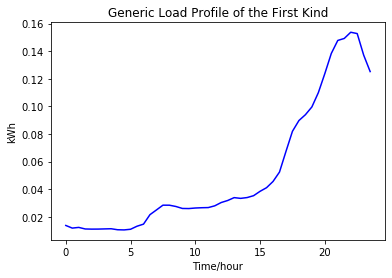

Text(0.5, 1.0, 'Generic Load Profile of the Fifth Kind')

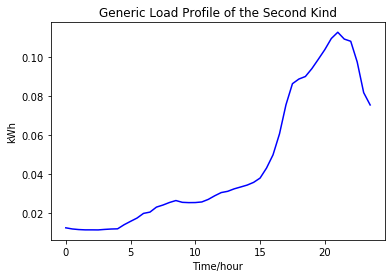

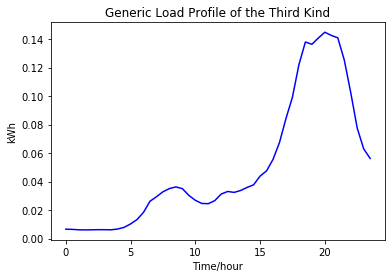

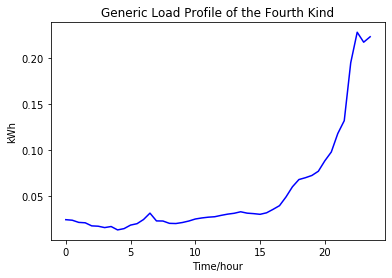

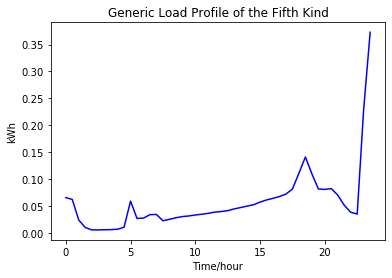

In [24]:
x = [0.5*i for i in range(48)]
plt.figure(1)
plt.plot(x, final_center[-1][0], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the First Kind')
plt.show()
plt.figure(2)
plt.plot(x, final_center[-1][1], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Second Kind')
plt.figure(3)
plt.plot(x, final_center[-1][2], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Third Kind')
plt.figure(4)
plt.plot(x, final_center[-1][3], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Fourth Kind')
plt.figure(5)
plt.plot(x, final_center[-1][4], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Fifth Kind')

In [16]:
out2,final_center2 = k_means(GC_array_ave, 3)
list2 = []   # so, we need to show it in list
for i in out2:
    list2.append(i)
print(list2[0])

(0, array([0.0124717 , 0.01093044, 0.01045198, 0.01029299, 0.01018972,
       0.01015172, 0.00990537, 0.0099254 , 0.01007728, 0.0106437 ,
       0.01236447, 0.02040397, 0.01253017, 0.01264477, 0.01685242,
       0.01853675, 0.02126242, 0.02417733, 0.02651674, 0.02621582,
       0.02628049, 0.02520531, 0.02492388, 0.02589522, 0.02765806,
       0.0283737 , 0.02712595, 0.02912598, 0.02972267, 0.03316926,
       0.03751531, 0.0412678 , 0.04579259, 0.05216926, 0.06483859,
       0.08179947, 0.09431481, 0.10519325, 0.11600041, 0.12282841,
       0.1315989 , 0.14043655, 0.1422666 , 0.13657128, 0.13168893,
       0.12506201, 0.1123538 , 0.10358623]))


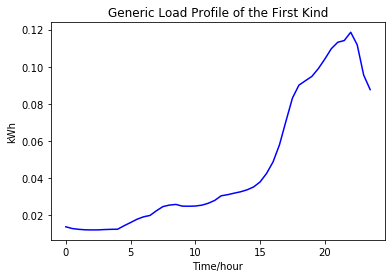

Text(0.5, 1.0, 'Generic Load Profile of the Third Kind')

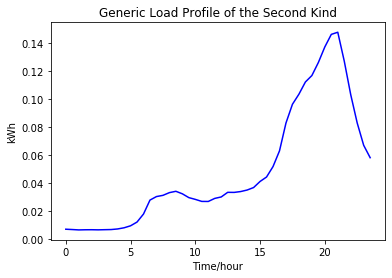

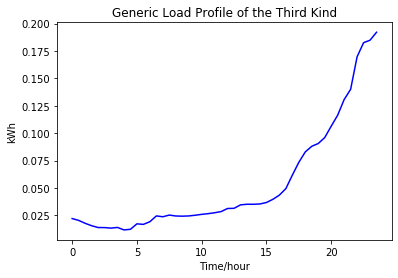

In [25]:
x = [0.5*i for i in range(48)]
plt.figure(1)
plt.plot(x, final_center2[-1][0], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the First Kind')
plt.show()
plt.figure(2)
plt.plot(x, final_center2[-1][1], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Second Kind')
plt.figure(3)
plt.plot(x, final_center2[-1][2], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Third Kind')

In [30]:
out3,final_center3 = k_means(GC_array_ave, 4)
list3 = []   # so, we need to show it in list
for i in out3:
    list3.append(i)
print(list3[0])

(0, array([0.0124717 , 0.01093044, 0.01045198, 0.01029299, 0.01018972,
       0.01015172, 0.00990537, 0.0099254 , 0.01007728, 0.0106437 ,
       0.01236447, 0.02040397, 0.01253017, 0.01264477, 0.01685242,
       0.01853675, 0.02126242, 0.02417733, 0.02651674, 0.02621582,
       0.02628049, 0.02520531, 0.02492388, 0.02589522, 0.02765806,
       0.0283737 , 0.02712595, 0.02912598, 0.02972267, 0.03316926,
       0.03751531, 0.0412678 , 0.04579259, 0.05216926, 0.06483859,
       0.08179947, 0.09431481, 0.10519325, 0.11600041, 0.12282841,
       0.1315989 , 0.14043655, 0.1422666 , 0.13657128, 0.13168893,
       0.12506201, 0.1123538 , 0.10358623]))


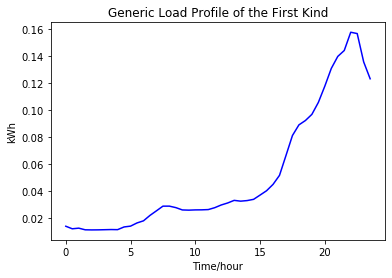

Text(0.5, 1.0, 'Generic Load Profile of the Fourth Kind')

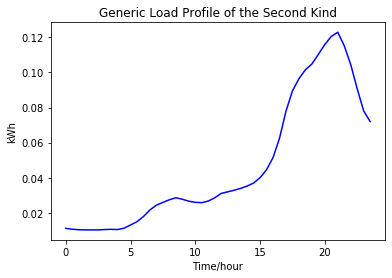

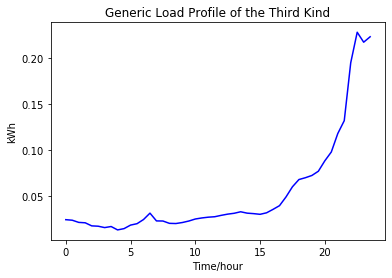

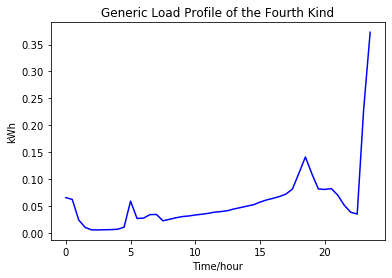

In [31]:
x = [0.5*i for i in range(48)]
plt.figure(1)
plt.plot(x, final_center3[-1][0], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the First Kind')
plt.show()
plt.figure(2)
plt.plot(x, final_center3[-1][1], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Second Kind')
plt.figure(3)
plt.plot(x, final_center3[-1][2], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Third Kind')
plt.figure(4)
plt.plot(x, final_center3[-1][3], 'b')
plt.xlabel(u'Time/hour')
plt.ylabel(u'kWh')
plt.title('Generic Load Profile of the Fourth Kind')

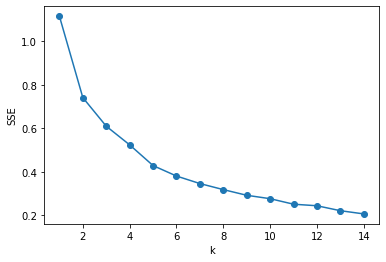

In [32]:
import pandas as pd  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
  
SSE = []  # 存放每次结果的误差平方和  
for k in range(1,15):  
    estimator = KMeans(n_clusters=k)  # 构造聚类器  
    estimator.fit(GC_array_ave)  
    SSE.append(estimator.inertia_)  
X = range(1,15)  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()  


In [34]:
GC_array[0:2]

array([[0.085, 0.142, 0.082, 0.119, 0.105, 0.088, 0.139, 0.057, 0.139,
        0.089, 0.098, 0.116, 0.067, 0.132, 0.16 , 0.391, 1.638, 1.557,
        0.579, 0.21 , 0.432, 0.606, 0.199, 0.35 , 0.25 , 0.19 , 0.172,
        0.19 , 0.148, 0.363, 0.115, 0.21 , 0.1  , 0.172, 0.079, 0.388,
        2.164, 2.035, 0.783, 0.859, 0.402, 0.283, 0.195, 0.297, 0.203,
        0.303, 0.307, 0.179],
       [0.166, 0.17 , 0.072, 0.149, 0.08 , 0.14 , 0.07 , 0.147, 0.072,
        0.139, 0.053, 0.152, 0.051, 0.12 , 0.087, 0.085, 0.198, 1.492,
        1.813, 1.479, 1.628, 1.528, 1.476, 1.578, 1.485, 0.421, 0.112,
        0.179, 0.171, 0.179, 0.822, 1.481, 1.442, 1.435, 1.646, 1.928,
        1.848, 1.711, 1.972, 1.859, 1.423, 1.498, 1.542, 1.438, 1.525,
        1.535, 1.544, 1.561]])

In [11]:
dist1=[]
dist2=[]
dist3=[]
dist4=[]
dist5=[]
label_pred=[]
points=[]
length_list=len(list)
for i in range(length_list):
    if(list[i][0]==0):
        dist1.append(distance(GC_array_stand[i],final_center[-1][0]))
    elif(list[i][0]==1):
        dist2.append(distance(GC_array_stand[i],final_center[-1][1]))
    elif(list[i][0]==2):
        dist3.append(distance(GC_array_stand[i],final_center[-1][2]))
    elif(list[i][0]==3):
        dist4.append(distance(GC_array_stand[i],final_center[-1][3]))
    elif(list[i][0]==4):
        dist5.append(distance(GC_array_stand[i],final_center[-1][4]))
dist1[0]

0.6378042071174892

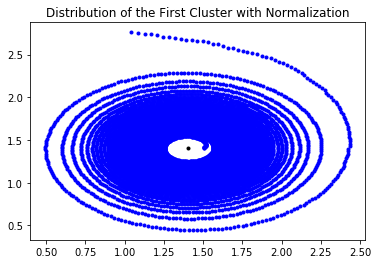

In [21]:
import numpy as np
dist11=dist1
dist11.sort()
max_dist11=dist11[-1]
len_dist11=len(dist11)
for i in range(len_dist11):
    theta=(i+1)*360/(len_dist11+1)
    x=max_dist11+dist11[i]*np.cos(theta)
    y=max_dist11+dist11[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist11, max_dist11, c='k', marker='.')
plt.title('Distribution of the First Cluster with Normalization')
plt.show()

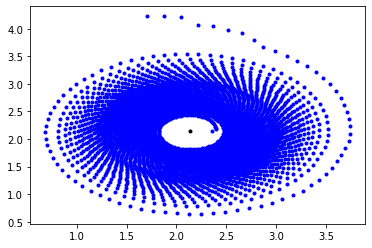

In [14]:
dist2.sort()
max_dist2=dist2[-1]
len_dist2=len(dist2)
for i in range(len_dist2):
    theta=(i+1)*360/(len_dist2+1)
    x=max_dist2+dist2[i]*np.cos(theta)
    y=max_dist2+dist2[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist2, max_dist2, c='k', marker='.')
plt.title('Distribution of the Second Cluster with Normalization')
plt.show()

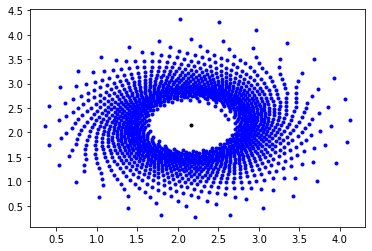

In [15]:
dist3.sort()
max_dist3=dist3[-1]
len_dist3=len(dist3)
for i in range(len_dist3):
    theta=(i+1)*360/(len_dist3+1)
    x=max_dist3+dist3[i]*np.cos(theta)
    y=max_dist3+dist3[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist3, max_dist3, c='k', marker='.')
plt.title('Distribution of the Third Cluster with Normalization')
plt.show()

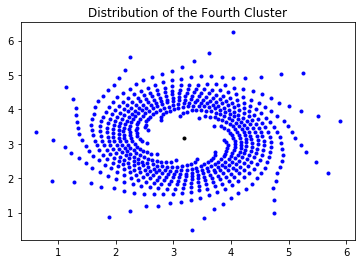

In [20]:
dist4.sort()
max_dist4=dist4[-1]
len_dist4=len(dist4)
for i in range(len_dist4):
    theta=(i+1)*360/(len_dist4+1)
    x=max_dist4+dist4[i]*np.cos(theta)
    y=max_dist4+dist4[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist4, max_dist4, c='k', marker='.')
plt.title('Distribution of the Fourth Cluster with Normalization')
plt.show()

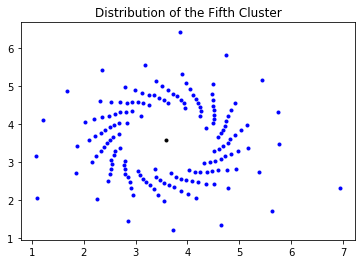

In [19]:
dist5.sort()
max_dist5=dist5[-1]
len_dist5=len(dist5)
for i in range(len_dist5):
    theta=(i+1)*360/(len_dist5+1)
    x=max_dist5+dist5[i]*np.cos(theta)
    y=max_dist5+dist5[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist5, max_dist5, c='k', marker='.')
plt.title('Distribution of the Fifth Cluster with Normalization')
plt.show()